## Empresa Venix

A empresa Venix de brinquedos está revendo seu planejamento de produção de carrinhos e triciclos. O lucro líquido por unidade de carrinho e triciclo produzido é de 12,00 Reais e 60,00 Reais, respectivamente. 

As matérias-primas e os insumos necessários para a fabricação de cada um dos produtos são terceirizados, cabendo à empresa os processos de usinagem, pintura e montagem. 

O processo de usinagem requer 15 minutos de mão de obra especializada por unidade de carrinho e 30 minutos por unidade de triciclo produzida. 
O processo de pintura requer 6 minutos de mão de obra especializada por unidade de carrinho e 45 minutos por unidade de triciclo produzida. 
Já o processo de montagem necessita de 6 minutos e 24 minutos para uma unidade de carrinho e triciclo produzido, respectivamente. 
O tempo disponível por semana é de 36, 22 e 15 horas para os processos de usinagem, pintura e montagem, respectivamente. 

A empresa quer determinar quanto produzir de cada produto por semana, respeitando as limitações de recursos, de forma a maximizar o lucro líquido semanal. Formular o problema de programação linear que maximiza o lucro líquido da empresa Venix. 

x_j = quantidade a ser fabricada do produto j por semana, j = 1, 2.

produto 1 = carrinhos; produto 2 = triciclos

maximizar 12 * x_1 + 60 * x_2

sujeito a:

0.25 * x_1 + 0.5 * x_2 <= 36

0.1 * x_1 + 0.75 * x_2 <= 22

0.1 * x_1 + 0.4 * x_2 <= 15

x_1, x_2 >= 0

In [1]:
from docplex.mp.model import Model
import cplex

m = Model(name='Venix')

x_1 = m.integer_var(name='x_1')
x_2 = m.integer_var(name='x_2')

m.add_constraint(0.25*x_1 + 0.5*x_2 <= 36)
m.add_constraint(0.1*x_1 + 0.75*x_2 <= 22)
m.add_constraint(0.1*x_1 + 0.4*x_2 <= 15)

m.add_constraint(x_1 >= 0)
m.add_constraint(x_2 >= 0)

m.maximize(12*x_1 + 60*x_2)

m.solve()
print(m.solution)

solution for: Venix
objective: 2040
x_1=70
x_2=20



### Usando o método de força bruta

1) testar, para cada combinação de m colunas de A, se elas formam uma base; 

2) calcular, para cada base, a solução básica associada a ela; 

3) calcular, para todas as SBV obtidas, o valor da função objetivo.

In [2]:
from math import factorial
from __future__ import print_function
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

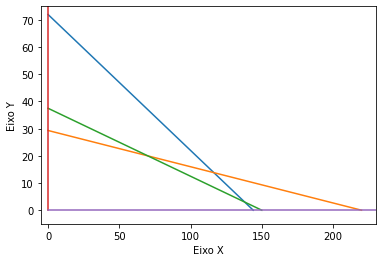

In [3]:
plt.plot([0, 144], [72, 0]) # 0.25 * x_1 + 0.5 * x_2 <= 36
plt.plot([0, 220], [29.33, 0]) # 0.1 * x_1 + 0.75 * x_2 <= 22
plt.plot([0, 150], [37.5, 0]) # 0.1 * x_1 + 0.4 * x_2 <= 15

plt.plot([0, 0], [0, 300]) # x2 >= 0
plt.plot([0, 300], [0, 0]) # x1 >= 0

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.axis([-5, 230, -5, 75]) # [xmin, xmax, ymin, ymax]

plt.show()

**Forma padrão:**

maximizar 12 * x_1 + 60 * x_2

sujeito a:

0.25 * x_1 + 0.5 * x_2 + x3 = 36

0.1 * x_1 + 0.75 * x_2 + x4 = 22

0.1 * x_1 + 0.4 * x_2 + x5 = 15

x_1, x_2 >= 0

In [4]:
# Informar aqui os valores da matriz A
A = np.array([[0.25, 0.5, 1, 0, 0],
              [0.1, 0.75, 0, 1, 0],
              [0.1, 0.4, 0, 0, 1]])

In [5]:
# Informar aqui os valores da matriz b
b = np.array([[36], 
              [22], 
              [15]])

In [6]:
# Informar aqui os valores do vetor c
c = np.array([12, 60, 0, 0, 0])

In [7]:
m = len(A)
print('m:', m)

n = len(A[0])
print('n:', n)

combinacoes = factorial(n)/(factorial(m)*(factorial(n-m)))

print('O número máximo de soluções básicas:', combinacoes)

m: 3
n: 5
O número máximo de soluções básicas: 10.0


In [8]:
def verifica_solucao_viavel(x):
    '''
        Função que verifica se a solução é viável
        
        >>> verifica_solucao_viavel([0, 0, [125.], 0, [125.], [475.], 0])
            Esta é uma solução básica viável
            True
        >> verifica_solucao_viavel([0, 0, 0, [300.], [-950.], 0, [500.]])
            Esta NÃO é uma solução básica viável
            False
        >> verifica_solucao_viavel([1, 0, 1, 0, 1, 0, 0])
            Esta é uma solução básica viável
            True
    '''
    
    xB_bool = []

    for w in range(0, len(x)):
        if(x[w] >= 0):
            xB_bool.append(True)           
        else:
            xB_bool.append(False)

        try:
            if(x[w][0] >= 0):
                xB_bool.append(True)
            else:
                xB_bool.append(False)
        except:
            pass
            
    if(all(xB_bool)):
        print('Esta é uma solução básica viável')
        return True
    else:
        print('Esta NÃO é uma solução básica viável')
        return False

In [9]:
solucoes_viaveis = np.array([[0,0,0], 0,0,0])
todas_solucoes = np.array([[0,0,0], 0,0,0])
cont_x = 0

for w in range(0, n):
    for y in range(w+1, n):
        for z in range(y+1, n):
            
            # Id da solução
            cont_x = cont_x + 1;
            print('\nx', cont_x)
            
            # Conjunto de índices IB
            IB = [w,y,z]
            print('IB =', IB[0]+1, IB[1]+1, IB[2]+1)
            
            # B
            B = np.array([A[0][w], A[0][y], A[0][z]])
            for v in range (1, m):
                B = np.row_stack(tup=(B, [A[v][w], A[v][y], A[v][z]]))
            print('B =', B, '\n')
            
            # Verificando se B é uma base
            v, V =  np.linalg.eig(B)

            if(v.all() == 0):
                print('A matriz B não é uma base')
                print('A linha LD é:')
                print (B[v == 0,:])
                print('\n---------------------------------------------------------------------------\n')
                
                # Colocar na tabela de soluções básicas, com informações vazias
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                continue

            # B-1
            try:
                B1 = np.linalg.inv(B)
                print('B-1 =', B1, '\n')
            except:
                print("B-1 não existe")
                todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, [], []]))
                print('\n---------------------------------------------------------------------------\n')
                continue

            # xB
            xB = B1.dot(b)
            print('xB =', xB, '\n')
            
            # x
            x = []
            for v in range (0, n):              
                if(v == IB[0]):
                    x.append(np.round(xB[0]))
                elif(v == IB[1]):
                    x.append(np.round(xB[1]))
                elif(v == IB[2]):
                    x.append(np.round(xB[2]))
                else:
                    x.append(0)
            print('x =', x, '\n')
                
            # cTx
            cTx = np.transpose(c).dot(x)
            print('cTx =', cTx, '\n')
                
            # Colocar na tabela de soluções básicas
            todas_solucoes = np.row_stack((todas_solucoes, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, cTx, x]))
            
            # Se a solução for viável, colocar na tabela de soluções viáveis
            if(verifica_solucao_viavel(x) == True):
                solucoes_viaveis = np.row_stack((solucoes_viaveis, [[IB[0]+1, IB[1]+1, IB[2]+1], cont_x, cTx, x]))
            
            print('\n---------------------------------------------------------------------------\n')



x 1
IB = 1 2 3
B = [[0.25 0.5  1.  ]
 [0.1  0.75 0.  ]
 [0.1  0.4  0.  ]] 

B-1 = [[  0.         -11.42857143  21.42857143]
 [  0.           2.85714286  -2.85714286]
 [  1.           1.42857143  -3.92857143]] 

xB = [[70. ]
 [20. ]
 [ 8.5]] 

x = [array([70.]), array([20.]), array([8.]), 0, 0] 

cTx = [2040.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 2
IB = 1 2 4
B = [[0.25 0.5  0.  ]
 [0.1  0.75 1.  ]
 [0.1  0.4  0.  ]] 

B-1 = [[  8.     0.   -10.  ]
 [ -2.     0.     5.  ]
 [  0.7    1.    -2.75]] 

xB = [[138.  ]
 [  3.  ]
 [  5.95]] 

x = [array([138.]), array([3.]), 0, array([6.]), 0] 

cTx = [1836.] 

Esta é uma solução básica viável

---------------------------------------------------------------------------


x 3
IB = 1 2 5
B = [[0.25 0.5  0.  ]
 [0.1  0.75 0.  ]
 [0.1  0.4  1.  ]] 

B-1 = [[ 5.45454545 -3.63636364  0.        ]
 [-0.72727273  1.81818182  0.        ]
 [-0.25454545 -0.36363636  1.        

<ipython-input-9-2906d91cff8a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  solucoes_viaveis = np.array([[0,0,0], 0,0,0])
<ipython-input-9-2906d91cff8a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  todas_solucoes = np.array([[0,0,0], 0,0,0])
<ipython-input-9-2906d91cff8a>:64: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cTx

In [10]:
## Formatando os valores do todas_solucoes para sair bonitinho na tabela

for x in range(1, len(todas_solucoes)):
    try:
        todas_solucoes[x][2] = todas_solucoes[x][2][0]
    except:
        pass

for x in range(1, len(todas_solucoes)):
    for y in range(0, len(todas_solucoes)):
        try:
            todas_solucoes[x][3][y] = todas_solucoes[x][3][y][0]
        except:
            pass

todas_solucoes

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2, 3], 1, 2040.0, [70.0, 20.0, 8.0, 0, 0]],
       [[1, 2, 4], 2, 1836.0, [138.0, 3.0, 0, 6.0, 0]],
       [[1, 2, 5], 3, 2232.0, [116.0, 14.0, 0, 0, -2.0]],
       [[1, 3, 4], 4, 1800.0, [150.0, 0, -2.0, 7.0, 0]],
       [[1, 3, 5], 5, 2640.0, [220.0, 0, -19.0, 0, -7.0]],
       [[1, 4, 5], 6, 1728.0, [144.0, 0, 0, 8.0, 1.0]],
       [[2, 3, 4], 7, 2280.0, [0, 38.0, 17.0, -6.0, 0]],
       [[2, 3, 5], 8, 1740.0, [0, 29.0, 21.0, 0, 3.0]],
       [[2, 4, 5], 9, 4320.0, [0, 72.0, 0, -32.0, -14.0]],
       [[3, 4, 5], 10, 0.0, [0, 0, 36.0, 22.0, 15.0]]], dtype=object)

In [11]:
print("Todas as soluções:")

todas_solucoes = pd.DataFrame(todas_solucoes[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
todas_solucoes.sort_values(by=['Id da solução'])

todas_solucoes

Todas as soluções:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,2040.0,"[70.0, 20.0, 8.0, 0, 0]"
1,"[1, 2, 4]",2,1836.0,"[138.0, 3.0, 0, 6.0, 0]"
2,"[1, 2, 5]",3,2232.0,"[116.0, 14.0, 0, 0, -2.0]"
3,"[1, 3, 4]",4,1800.0,"[150.0, 0, -2.0, 7.0, 0]"
4,"[1, 3, 5]",5,2640.0,"[220.0, 0, -19.0, 0, -7.0]"
5,"[1, 4, 5]",6,1728.0,"[144.0, 0, 0, 8.0, 1.0]"
6,"[2, 3, 4]",7,2280.0,"[0, 38.0, 17.0, -6.0, 0]"
7,"[2, 3, 5]",8,1740.0,"[0, 29.0, 21.0, 0, 3.0]"
8,"[2, 4, 5]",9,4320.0,"[0, 72.0, 0, -32.0, -14.0]"
9,"[3, 4, 5]",10,0.0,"[0, 0, 36.0, 22.0, 15.0]"


In [12]:
qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)

print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)


Quantidade de soluções básicas:  10


<ipython-input-12-243826ed9650>:1: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  qtd_solucoes_basicas = list(map(lambda z, sb=0: sb if z == [] else sb+1, todas_solucoes.loc[:, 'cTx'])).count(1)


In [13]:
## Formatando os valores do solucoes_viaveis para sair bonitinho na tabela

for x in range(1, len(solucoes_viaveis)):
    try:
        solucoes_viaveis[x][2] = solucoes_viaveis[x][2][0]
    except:
        pass

for x in range(1, len(solucoes_viaveis)):
    for y in range(0, len(solucoes_viaveis)):
        try:
            solucoes_viaveis[x][3][y] = solucoes_viaveis[x][3][y][0]
        except:
            pass

solucoes_viaveis

array([[[0, 0, 0], 0, 0, 0],
       [[1, 2, 3], 1, 2040.0, [70.0, 20.0, 8.0, 0, 0]],
       [[1, 2, 4], 2, 1836.0, [138.0, 3.0, 0, 6.0, 0]],
       [[1, 4, 5], 6, 1728.0, [144.0, 0, 0, 8.0, 1.0]],
       [[2, 3, 5], 8, 1740.0, [0, 29.0, 21.0, 0, 3.0]],
       [[3, 4, 5], 10, 0.0, [0, 0, 36.0, 22.0, 15.0]]], dtype=object)

In [14]:
print("Soluções viáveis:")

solucoes_viaveis = pd.DataFrame(solucoes_viaveis[1:,:], columns=['Conjunto de índices base', 'Id da solução', 'cTx', 'Solução básica associada à base'])
solucoes_viaveis.sort_values(by=['Id da solução'])

solucoes_viaveis

Soluções viáveis:


,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,2040.0,"[70.0, 20.0, 8.0, 0, 0]"
1,"[1, 2, 4]",2,1836.0,"[138.0, 3.0, 0, 6.0, 0]"
2,"[1, 4, 5]",6,1728.0,"[144.0, 0, 0, 8.0, 1.0]"
3,"[2, 3, 5]",8,1740.0,"[0, 29.0, 21.0, 0, 3.0]"
4,"[3, 4, 5]",10,0.0,"[0, 0, 36.0, 22.0, 15.0]"


In [15]:
qtd_solucoes_viaveis = len(solucoes_viaveis)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)


Quantidade de soluções viáveis:  5


In [16]:
## Digite 1 se você deseja maximizar ou 2 se você deseja minimizar
entrada = 1

if(entrada == 1):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmax()
elif(entrada == 2):
    id_solucao_otima = solucoes_viaveis['cTx'].astype(float).argmin()
    
solucao_otima = solucoes_viaveis['cTx'][id_solucao_otima]
geram_solucoes_otimas =  solucoes_viaveis['cTx'][id_solucao_otima]
print('Solução Ótima:', solucao_otima)


Solução Ótima: 2040.0


In [17]:
print('\nSoluções que geram a solução ótima:\n')

geram_solucoes_otimas = solucoes_viaveis.loc[solucoes_viaveis['cTx'] == solucao_otima, :]

geram_solucoes_otimas


Soluções que geram a solução ótima:



,Conjunto de índices base,Id da solução,cTx,Solução básica associada à base
0,"[1, 2, 3]",1,2040.0,"[70.0, 20.0, 8.0, 0, 0]"


In [18]:
pontos_extremos = 4

print('\nO número máximo de soluções básicas:', combinacoes)
print("\nQuantidade de soluções básicas: ", qtd_solucoes_basicas)
print("\nQuantidade de soluções viáveis: ", qtd_solucoes_viaveis)
print('\nPontos Extremos:', pontos_extremos)

print('\nSolução Ótima:', solucao_otima)


O número máximo de soluções básicas: 10.0

Quantidade de soluções básicas:  10

Quantidade de soluções viáveis:  5

Pontos Extremos: 4

Solução Ótima: 2040.0
